### Importing Libraries and Loading the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

%matplotlib inline
sns.set()

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1939,8267-KFGYD,Male,0,No,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,21.05,21.05,No
787,2202-OUTMO,Female,0,Yes,No,34,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),60.85,2003.6,No
6105,9249-FXSCK,Female,0,No,No,52,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),111.25,5916.45,Yes
6286,2717-HVIZY,Female,0,No,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,163.6,No
3015,1498-NHTLT,Male,0,Yes,Yes,59,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,86.75,5186,No


### Dropping CustomerID because its Unique for each Persons

In [ ]:
df.drop(columns = 'customerID', inplace=True )

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Replacing Total Charges (Object) into Numeric

In [ ]:
pd.to_numeric(df.TotalCharges, errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
### to checking Total Charges are empty
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df.iloc[488]['TotalCharges']

' '

In [ ]:
df1 = df[df.TotalCharges!= ' ']

In [ ]:
print('Original Shape of Dataframe is', df.shape)
print('After Removing Null Space in Total Charges, Shape of Dataframe is', df1.shape)

Original Shape of Dataframe is (7043, 20)
After Removing Null Space in Total Charges, Shape of Dataframe is (7032, 20)


In [ ]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

<ipython-input-10-b67e0c3d31a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Checking Null and Duplicated ( If exist, removing them )

In [ ]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df1[df1.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


In [ ]:
df1 = df1.drop_duplicates()

In [ ]:
df1.duplicated().sum()

0

### Visualizing and Checking the Tenure of People who are Leaving the Company or Not.

In [ ]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

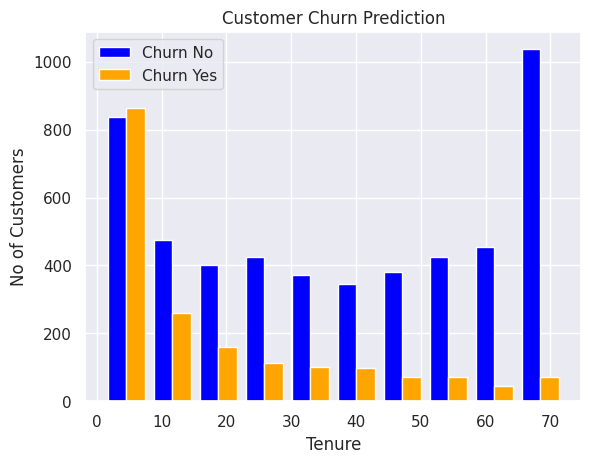

In [ ]:
plt.hist([tenure_churn_no, tenure_churn_yes], color=['Blue','Orange'], label=['Churn No','Churn Yes'])

plt.xlabel('Tenure')
plt.ylabel('No of Customers')
plt.title('Customer Churn Prediction')
plt.legend()

### Visualizing and Checking the Monthly Charge of People Which are the main source for leaving

In [ ]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

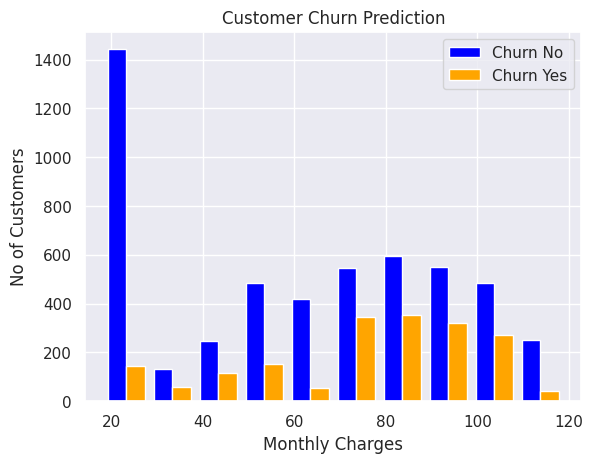

In [ ]:
plt.hist([mc_churn_no, mc_churn_yes], color=['Blue','Orange'], label=['Churn No','Churn Yes'])

plt.xlabel('Monthly Charges')
plt.ylabel('No of Customers')
plt.title('Customer Churn Prediction')
plt.legend()

### Checking dtypes of All Columns

In [ ]:
def print_uniq_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [ ]:
print_uniq_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


### See, there are two dtypes "'No internet service" and 'No phone service' in columns **MultipleLines** and **OnlineSecurity** . We replace them in "NO"

In [ ]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

In [ ]:
print_uniq_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


### Encoding **Yes** and **No** into **1** and **0**

In [ ]:
yes_no_column = ['Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies','PaperlessBilling']

In [ ]:
for col in yes_no_column:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace = True)

In [ ]:
for col in df1:
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


### Doing the Same with the Columns Gender

In [ ]:
df1.gender.replace({'Female': 1, 'Male': 0}, inplace = True)

### One Hot Coding

In [ ]:
df2 = pd.get_dummies(df1, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype=int)
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5776,0,0,1,0,72,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
1818,0,0,1,1,60,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
4041,0,0,0,0,46,0,0,1,0,1,...,1,0,0,0,0,1,1,0,0,0
4323,1,0,0,0,32,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1674,1,0,1,1,23,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

### Min Max Scaling

In [ ]:
### Scaling
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']


from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df2[cols_to_scale] = min_max_scaler.fit_transform(df2[cols_to_scale])

In [ ]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2161,1,0,0,0,0.014085,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3838,1,0,0,0,0.352113,1,1,0,0,1,...,0,1,0,1,0,0,1,0,0,0
174,1,0,0,0,0.436620,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
3088,0,0,1,1,0.633803,1,0,1,0,1,...,1,0,0,0,0,1,0,0,0,1
4190,1,0,1,0,0.140845,1,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [ ]:
for col in df2:
    print(f'{col} : {df2[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

<h1>Now Our Data is Ready for Training</h1>

In [ ]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

### Replacing Churn Object to Int

In [ ]:
df2.Churn.replace({'Yes': 1, 'No': 0}, inplace = True)

In [ ]:
X = df2.drop(columns='Churn')
Y = df2[['Churn']]

In [ ]:
print('Shape of Original Data Type', df2.shape)
print('Shape of Independent Variable', X.shape)
print('Shape of Dependent Variable', Y.shape)

Shape of Original Data Type (7010, 27)
Shape of Independent Variable (7010, 26)
Shape of Dependent Variable (7010, 1)


<h1>Training and Testing</h1>

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size=0.30, random_state=25, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(4907, 26) (4907, 1)
(2103, 26) (2103, 1)


<h1>Performing Model</h1>

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(xtrain, ytrain, epochs=30)

Epoch 1/30
154/154 [==============================] - 1s 2ms/step - loss: 0.5177 - accuracy: 0.7428
Epoch 2/30
154/154 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.7864
Epoch 3/30
154/154 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.7932
Epoch 4/30
154/154 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.7956
Epoch 5/30
154/154 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.8005
Epoch 6/30
154/154 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8013
Epoch 7/30
154/154 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8050
Epoch 8/30
154/154 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8037
Epoch 9/30
154/154 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8056
Epoch 10/30
154/154 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8046

In [ ]:
model.evaluate(xtest, ytest)

66/66 [==============================] - 0s 1ms/step - loss: 0.4136 - accuracy: 0.8074


[0.413644015789032, 0.8074179887771606]

<h1>Prediction</h1>

In [ ]:
y_pred = model.predict(xtest)
y_pred[:9]

66/66 [==============================] - 0s 2ms/step


array([[0.25274587],
       [0.05417844],
       [0.5610876 ],
       [0.02691135],
       [0.43670937],
       [0.22209264],
       [0.03327018],
       [0.6532786 ],
       [0.37638664]], dtype=float32)

In [ ]:
y_pred_binary = []
for element in y_pred:
    if element > 0.5:
        y_pred_binary.append(1)
    else:
        y_pred_binary.append(0)


<h1>Compariing Prediction with Actual One</h1>

In [ ]:
y_pred_binary[:9]

[0, 0, 1, 0, 0, 0, 0, 1, 0]

In [ ]:
ytest[:9]

,Churn
3320,0
1767,0
6714,0
4909,0
3007,1
257,0
1714,0
474,1
6156,0


<h1>Confusion Matrix Classification Report</h1>

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_pred_binary, ytest))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1672
           1       0.52      0.67      0.59       431

    accuracy                           0.81      2103
   macro avg       0.72      0.76      0.73      2103
weighted avg       0.83      0.81      0.82      2103



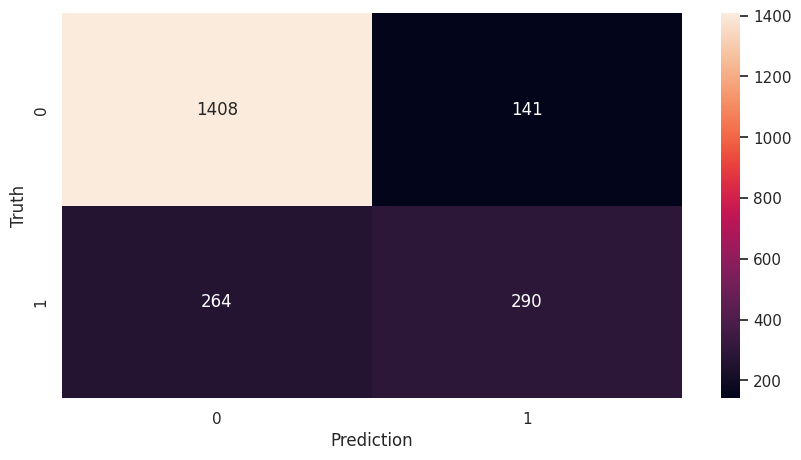

In [ ]:
import seaborn as sns

cm = tf.math.confusion_matrix(labels=np.array(ytest, dtype=np.int64),
                              predictions=np.array(y_pred_binary, dtype=np.int64))

plt.figure(figsize=(10,5))
sns.heatmap(data=cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

<h1> Explaination of this Confusion Matric </h1>

<h1> Our positive class is represented by 1 (Yes) and the negative class by 0 (No).
The model correctly predicted that 302 customers who churned would churn (True Prediction of Positive Class), but incorrectly predicted that 252 customers who churned would not churn (False Prediction of Negative Class).
The model correctly predicted that 1371 customers who did not churn would not churn (True Prediction of Negative Class ), but incorrectly predicted that 178 customers who did not churn would churn (False Prediction of Positive Class). </h1>

<h1>Accuracy of the Model</h1>

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, y_pred_binary)
print('Accuracy of Our Neural Netwrod Model is', accuracy)

Accuracy of Our Neural Netwrod Model is 0.8074179743223966


In [ ]:
import joblib  # In newer versions of sklearn, use 'from joblib import dump, load'

# Save the model
joblib.dump(model, 'customer_churn.pkl')

['customer_churn.pkl']

In [ ]:
# Load the model
nb_loaded = joblib.load('customer_churn.pkl')